### [GLOBAL_REANALYSIS_PHY_001_030](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=GLOBAL_REANALYSIS_PHY_001_030)

The GLORYS12V1 product is the CMEMS global ocean eddy-resolving (1/12° horizontal resolution, 50 vertical levels) reanalysis covering the altimetry (1993 onward).

It is based largely on the current real-time global forecasting CMEMS system. The model component is the NEMO platform driven at surface by ECMWF ERA-Interim then ERA5 reanalyses for recent years. Observations are assimilated by means of a reduced-order Kalman filter. Along track altimeter data (Sea Level Anomaly), Satellite Sea Surface Temperature, Sea Ice Concentration and In situ Temperature and Salinity vertical Profiles are jointly assimilated. Moreover, a 3D-VAR scheme provides a correction for the slowly-evolving large-scale biases in temperature and salinity.

This product includes daily and monthly mean files for temperature, salinity, currents, sea level, mixed layer depth and ice parameters from the top to the bottom. The global ocean output files are displayed on a standard regular grid at 1/12° (approximatively 8 km) and on 50 standard levels.

***

| Module name | Description |
| :---: | :---|
| **os** | [ Miscellaneous operating system interfaces](https://docs.python.org/3.7/library/os.html) for managing paths, creating directories,... |
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |
| **basemap** |[The matplotlib basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps in Python. |
| **gsw** |[Gibbs-SeaWater (GSW) Oceanographic Toolbox](http://www.teos-10.org/software.htm) contains the TEOS-10 subroutines for evaluating the thermodynamic prope.

The most important module used in this example is **gsw** (Gibbs-SeaWater).

The [Gibbs-SeaWater (GSW) Oceanographic Toolbox](http://www.teos-10.org/software.htm) contains the TEOS-10 subroutines for evaluating the thermodynamic properties of pure water (using IAPWS-09) and seawater (using IAPWS-08 for the saline part). The GSW library does not provide properties of ice or moist air (these properties can be found in the SIA library). This GSW Oceanographic Toolbox does not adhere to strict basic-SI units but rather oceanographic units are adopted.

This Python implementation of the Thermodynamic Equation of Seawater 2010 (TEOS-10) is based primarily on numpy ufunc wrappers of the GSW-C implementation. We expect it to replace the original python-gsw pure-python implementation after a brief overlap period. The primary reasons for this change are that by building on the C implementation we reduce code duplication and we gain an immediate update to the 75-term equation. Additional benefits include a major increase in speed, a reduction in memory usage, and the inclusion of more functions. The penalty is that a C (or MSVC C++ for Windows) compiler is required to build the package from source.

**References**:

- [gsw python GitHub](https://github.com/TEOS-10/GSW-Python)

- [Documentation on GSW-Python](https://teos-10.github.io/GSW-Python)

- [Documentation on gsw.density](https://teos-10.github.io/GSW-Python/density.html)

### Regions:

The delta region is defined as 70.2 to 68.4 N, -139 to -131.5 W, 55,578km^2, surface to -250 m <br>
The "Ngheim region" is defined as 123 W–147 W, latitude 74 N in the north, and the coastline along the south side.

### Coordinate Variables
latitude<br>
longitude<br>
depth - surface to 250 m <br>
time  - monthly from 1/1993 to 5/2020 <br>

### Data Variables:

Eastward sea ice velocity **usi** <br>
Eastward sea water velocity **uo** <br>
Northward sea ice velocity **vsi** <br>
Northward sea water velocity **vo** <br>
Ocean mixed layer thickness defined by sigma theta **mlotst** <br>
Sea ice area fraction **siconc** <br>
Sea ice thickness **sithick** <br>
Sea ice velocity **siv** <br>
Sea surface height above geoid **zos** <br>
Sea water potential temperature at sea floor **bottomt** <br>
Sea water salinity **so** <br>
Sea water velocity **swv** <br>
Sea water potential temperature **thetao** <br>

In [1]:
import os
for filename in os.listdir('/Users/mariemccrary/Research/GLORYS12v1/Delta_area/'):
    if filename.endswith(".nc"):
        print(filename)

G12v1_delta_vo.nc
G12v1_delta_bottomt.nc
G12v1_delta_uo.nc
G12v1_delta_thetao.nc
G12v1_delta_usi.nc
G12v1_delta_so.nc
G12v1_delta_siv.nc
G12v1_delta_sithick.nc
G12v1_delta_mlotst.nc
G12v1_delta_swv.nc
G12v1_delta_siconc.nc
G12v1_delta_vsi.nc
G12v1_delta_zos.nc


### Import the modules


For avoiding the warning messages during the execution and installation process, at first remove them:

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
import gsw.density as density

*Don't change the following constants, which define the training and the notebook codes*:

In [5]:
REGION_CODE = "01"
NB_CODE = "01"

**checkDir**: function for creating a path, if needed

In [6]:
def checkDir(outPath):
    if not os.path.exists(outPath):
        os.makedirs(outPath)

**getRangeIndexes**: function for getting the indexes of the array *arr* between the *var_min* and *var_max* values:

In [7]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

Set the paths:

In [8]:
# Path for netcdf files
data_path = '/Users/mariemccrary/Research/GLORYS12v1/Delta_area/'
# Path for the output files (images, etc)
out_path = '/Users/mariemccrary/Research/GLORYS12v1/Delta_area/out/'

In [9]:
# Create directories
checkDir(data_path)
checkDir(out_path)

Check if the new directories have been created... 

In [10]:
for filename in os.listdir('.'):
    print(filename)

.DS_Store
Ngheim_area
GLORYS_SST.ipynb
Delta_area
.ipynb_checkpoints
GLORYS12v1Maps.ipynb
Loop_on_date_python_script.py


... and if the data files are available:

In [11]:
for filename in os.listdir(data_path):
    print(filename)

G12v1_delta_vo.nc
G12v1_delta_bottomt.nc
G12v1_delta_uo.nc
G12v1_delta_thetao.nc
out
G12v1_delta_usi.nc
G12v1_delta_so.nc
G12v1_delta_siv.nc
G12v1_delta_sithick.nc
G12v1_delta_mlotst.nc
G12v1_delta_swv.nc
G12v1_delta_siconc.nc
.ipynb_checkpoints
G12v1_delta_vsi.nc
G12v1_delta_zos.nc


### Access the data


In [84]:
# Input netcdf files
file_f = ["G12v1_delta_thetao.nc",
         "G12v1_delta_so.nc",
         "G12v1_delta_mlotst.nc",
         "G12v1_delta_uo.nc", 
         "G12v1_delta_vo.nc"] 
# Build the complete nc path
file_nc = [os.path.join(data_path, f) for f in file_f]

In [85]:
# Open the nc dataset
file_ds = [ xr.open_dataset(nc) for nc in file_nc]

In [86]:
# index for the ds arrays
# 0 = temperature, 1 = salinity, 2 = mld, 3 = u, 4 = v
j = 0

In [87]:
file_ds[0].info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (depth: 27, latitude: 22, time: 329, longitude: 89)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 155.9 186.1 222.5
  * latitude   (latitude) float32 68.5 68.58 68.67 68.75 ... 70.08 70.17 70.25
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-05-16T12:00:00
  * longitude  (longitude) float32 -139.0 -138.9 -138.8 ... -131.8 -131.8 -131.7
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...

In [88]:
file_ds[1].info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (depth: 27, latitude: 22, time: 329, longitude: 89)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 155.9 186.1 222.5
  * latitude   (latitude) float32 68.5 68.58 68.67 68.75 ... 70.08 70.17 70.25
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-05-16T12:00:00
  * longitude  (longitude) float32 -139.0 -138.9 -138.8 ... -131.8 -131.8 -131.7
Data variables:
    so         (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...

In [89]:
file_ds[0].coords

Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 155.9 186.1 222.5
  * latitude   (latitude) float32 68.5 68.58 68.67 68.75 ... 70.08 70.17 70.25
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-05-16T12:00:00
  * longitude  (longitude) float32 -139.0 -138.9 -138.8 ... -131.8 -131.8 -131.7

In [90]:
file_ds[0].depth

<xarray.DataArray 'depth' (depth: 27)>
array([  0.494025,   1.541375,   2.645669,   3.819495,   5.078224,   6.440614,
         7.92956 ,   9.572997,  11.405   ,  13.46714 ,  15.81007 ,  18.49556 ,
        21.59882 ,  25.21141 ,  29.44473 ,  34.43415 ,  40.34405 ,  47.37369 ,
        55.76429 ,  65.80727 ,  77.85385 ,  92.32607 , 109.7293  , 130.666   ,
       155.8507  , 186.1256  , 222.4752  ], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 3.819 ... 130.7 155.9 186.1 222.5
Attributes:
    valid_min:               0.494025
    valid_max:               222.4752
    units:                   m
    positive:                down
    unit_long:               Meters
    long_name:               Depth
    standard_name:           depth
    axis:                    Z
    _ChunkSizes:             50
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

In [91]:
file_ds[0].data_vars

Data variables:
    thetao   (time, depth, latitude, longitude) float32 ...

In [92]:
file_ds[0].data_vars['thetao']

<xarray.DataArray 'thetao' (time: 329, depth: 27, latitude: 22, longitude: 89)>
[17392914 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 155.9 186.1 222.5
  * latitude   (latitude) float32 68.5 68.58 68.67 68.75 ... 70.08 70.17 70.25
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-05-16T12:00:00
  * longitude  (longitude) float32 -139.0 -138.9 -138.8 ... -131.8 -131.8 -131.7
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    units:          degrees_C
    unit_long:      Degrees Celsius
    cell_methods:   area: mean
    _ChunkSizes:    [  1   7 341 720]

In [94]:
file_ds[3].data_vars

Data variables:
    uo       (time, depth, latitude, longitude) float32 ...

### Set the configuration


Let's check the coordinates names in the cells above (check the ***ds.coords*** outputs) and set the correct variables below:

In [22]:
# Set the coordinate names (used later for accessing the data)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"

Do the same for the variables names (check the ***ds.data_vars*** outputs): 

In [95]:
# Set the variable names
tem_name = "thetao"
sal_name = "so"
mld_name = "mlotst"
u_name = "uo"
v_name = "vo"

### Configure the variables for the plots

Set the variable to plot
Set the **index j** for the ds arrays. 

Where **j=0** for temperature, **j=1** for salinity

In [96]:
j=0

Choose the min and max values for the coordinates (and comment with the symbol # the unnecessary ones!)  

In [97]:
# Set lat-lon limits - FULL AREA
lat_min = file_ds[j][lat_name].min()
lat_max = file_ds[j][lat_name].max()
lon_min = file_ds[j][lon_name].min()
lon_max = file_ds[j][lon_name].max()

# # Set lat-lon limits - CUSTOM AREA
# lon_min = 110
# lon_max = 140
# lat_min = 10
# lat_max = 40

Set the variable's min and max values for the plot and the colorbar (otherwise assign None):

In [98]:
#min_value, max_value = None, None #automatic colobar limits
#plot of temperature values
min_value_temp, max_value_temp = None, None
#plot of salinity values
min_value_sal, max_value_sal = None, None

Set the desired depth (in meters). The plot will return the nearest depth found in the model. 

In [99]:
d = 0

Set the desired month. The plot will return the nearest time found in the model. 

In [100]:
month = '2003-07-16'

### Generate the maps


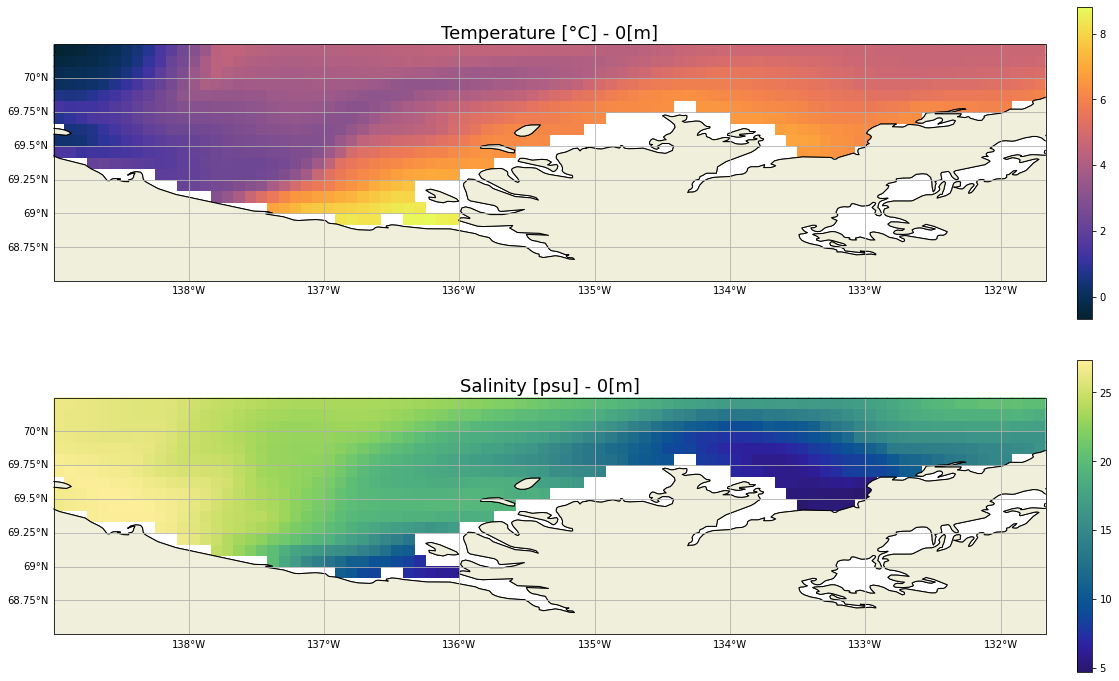

In [101]:
# Define the caracteristics of the map

f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(211,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(212,projection=ccrs.PlateCarree())


# Temperature plot
j=0 
ax1.coastlines()
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl1.right_labels = False
gl1.top_labels = False
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax1.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
ax1.set_title('Temperature [°C] - 0[m]' ,fontsize=18)
        
im1 = ax1.pcolor(file_ds[j][lon_name].data,file_ds[j][lat_name].data,file_ds[j][tem_name].sel(time = month, depth=d,method='nearest').squeeze(),vmin=min_value_temp,vmax=max_value_temp,cmap='cmo.thermal')
f.colorbar(im1,ax=ax1,fraction=0.015, pad=0.03)

#Salinity plot
j=1
ax2.coastlines()
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl2.right_labels = False
gl2.top_labels = False
ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax2.set_extent([lon_min,lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
ax2.set_title('Salinity [psu] - 0[m]' ,fontsize=18)
        
im2 = ax2.pcolor(file_ds[j][lon_name].data,file_ds[j][lat_name].data,file_ds[j][sal_name].sel(time = month, depth=d,method='nearest').squeeze(),vmin=min_value_sal,vmax=max_value_sal,cmap='cmo.haline')
f.colorbar(im2,ax=ax2,fraction=0.015, pad=0.03)

f.tight_layout()

In [116]:
tmean = file_ds[0].thetao.mean(dim=('latitude', 'longitude')).transpose()
smean = file_ds[1].so.mean(dim=('latitude', 'longitude')).transpose()
mldmean = file_ds[2].mlotst.mean(dim=('latitude', 'longitude'))
vmean = file_ds[4].vo.mean(dim=('latitude', 'longitude', 'depth'))

In [120]:
vmean.min()

<xarray.DataArray 'vo' ()>
array(-0.00729652)

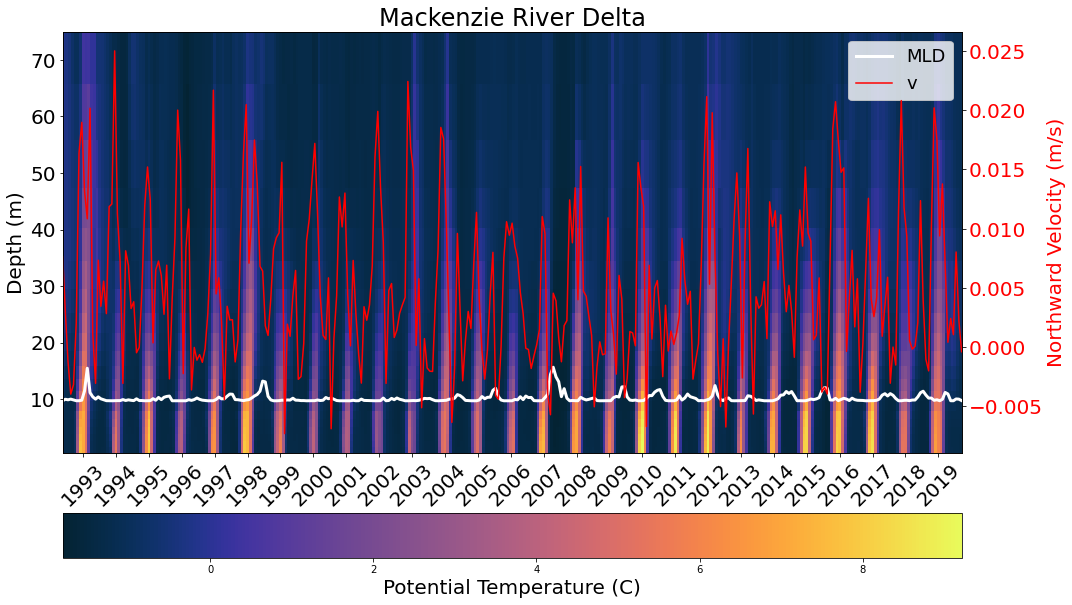

In [167]:
fig, ax = plt.subplots(figsize=(15,9))

mappable = ax.pcolormesh(file_ds[0].time, file_ds[0].depth, tmean, cmap=cmo.thermal)
ln1=ax.plot(file_ds[2].time,mldmean, color='w', linewidth=3, label = 'MLD')
cb = fig.colorbar(mappable, location='bottom', fraction=0.2, pad=0.1)
plt.ylabel("Depth (m)", fontsize=20)
ax.set_ylim([0.5, 75])
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)
cb.set_label('Potential Temperature (C)', fontsize=20)
ax.legend()

color = 'red'
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Northward Velocity (m/s)', color=color, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=20)

# Use this to get both axes in the same legend
ln2=ax2.plot(file_ds[4].time,vmean, 'r', label = 'v')
lns = ln1+ln2
lbls = [l.get_label() for l in lns]

ax.legend(lns, lbls, loc=0, fontsize=18)

# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.title('Mackenzie River Delta', fontsize = 24)
fig.tight_layout()

# output file
title = 'delta_temp_mld_v'
output_file = os.path.join(out_path,title.replace(' ','_')) + ".png"

 # save the output file
plt.savefig(output_file, facecolor='white', transparent=False)

plt.show()

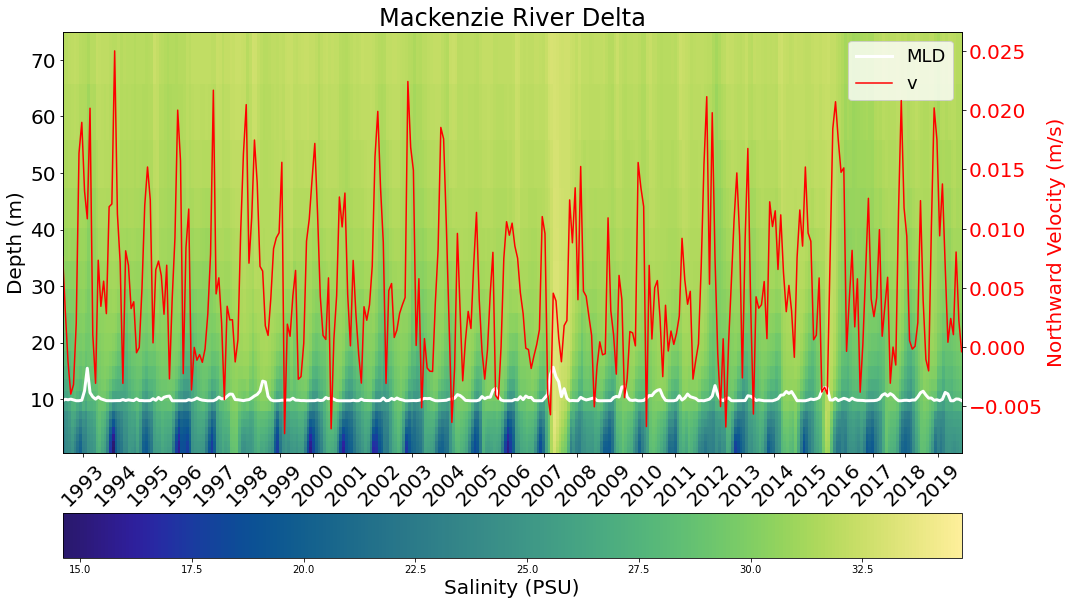

In [170]:
fig, ax = plt.subplots(figsize=(15,9))

mappable = ax.pcolormesh(file_ds[1].time, file_ds[1].depth, smean, cmap=cmo.haline)
ax.plot(file_ds[2].time,mldmean, color='w', linewidth=3, label = 'MLD')
cb = fig.colorbar(mappable, location='bottom', fraction=0.2, pad=0.1)
plt.ylabel("Depth (m)", fontsize=20)
ax.set(ylabel = "Depth (m)")
ax.set_ylim([0.5, 75])
cb.set_label('Salinity (PSU)')
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)
cb.set_label('Salinity (PSU)', fontsize=20)
ax.legend()

color = 'red'
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Northward Velocity (m/s)', color=color, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=20)

# Use this to get both axes in the same legend
ln2=ax2.plot(file_ds[4].time,vmean, 'r', label = 'v')
lns = ln1+ln2
lbls = [l.get_label() for l in lns]

ax.legend(lns, lbls, loc=0, fontsize=18)

# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.title('Mackenzie River Delta', fontsize = 24)
fig.tight_layout()

# output file
title = 'delta_sal_mld_v'
output_file = os.path.join(out_path,title.replace(' ','_')) + ".png"

 # save the output file
plt.savefig(output_file, facecolor='white', transparent=False)

plt.show()

### Analysis of the variability of the mixed layer depth in the area.
    
Large uncertainties are usually found where there is an abrupt change in temperature (called thermocline) which is difficult to model accurately. Above the thermocline exists the so called "Mixed Layer" in which the water is well mixed, so all the properties of the water are homogeneous. The vertical extension of the Mixed Layer is shown by the variable Mixed Layer Depth (MLD) .  



<div class="alert alert-block alert-warning">

### LET'S TRY: Change the plot!

If you want, you can change the above plot.

For example, you could:
- change the variable to plot
- change the area
- change the min/max values for the choosen variable
- change the depth level (only for 3D datasets! ;))

Try to plot salinity at 100m and temperature at 100m 

Go back to [Configure the variables for the plots](#2.3.6.-Configure-the-variables-for-the-plots) and then re-execute the cell for generating the plot. Try!

### 2.3.8. Generate the map of currents (vector)
[Go back to the "Table of contents"](#Table-of-contents)

Several studies of the Malvinas current were performed in that area using GLO MFC products. 

For 2015, with a focus on the 41°S area and the confluence with the Brasil current: 
["Fronts of the Malvinas Current System: Surface and Subsurface Expressions Revealed by Satellite Altimetry, Argo Floats, and Mercator Operational Model Outputs"](https://doi.org/10.1029/2018JC013887) 

*A pdf version of this article can be found in docs/ and downloadable [here](./docs/2018JC013887.pdf)*

For 2011, with a focus on the 51°S area and the water masses in the southern part of the domain:
["Revisiting the Malvinas Current Upper Circulation and Water Masses Using a High-Resolution Ocean Reanalysis"](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021JC017271).
 

Let's start by having a look at the surface currents in 2015

Set the index for the dataset array

In [27]:
# index for the dataset array
#j = "2011-01"
#j = "2011-08"
#j = "2015-04"
j = "2015-05"

Set the limits for the area: choose the min and max values for the coordinates (and comment with the symbol # the unnecessary ones!):  

In [28]:
# Set lat-lon limits - FULL AREA
lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

# # Set lat-lon limits - CUSTOM AREA
# lon_min = -65
# lon_max = -42
# lat_min = -56
# lat_max = -36

Set the desired depth (in meters)

In [29]:
d = 0

Set the variable's min and max values for the plot and the colorbar (otherwise assign None):

In [30]:
#min_value, max_value = -0.5, 2
min_value, max_value = None, None # set None, None for authomatic colobar limits

In [31]:
# Skip points for the vectors of directions
#skip_points = 15 # for wider areas
skip_points = 7 # for narrow areas

In [32]:
# Vector scale
v_scale = 18

In [33]:
# --- Choose the variable to plot
uo_sel = file_ds[j][uo_name]
vo_sel = file_ds[j][vo_name]
mod_sel = (uo_sel**2+vo_sel**2)**0.5 

var_sel = mod_sel

dataset_3D = False 
if depth_name in var_sel.coords:
    dataset_3D = True
    
# --- Set up the arrays of coordinates for the selected dataset ---
lats = var_sel[lat_name]
lons = var_sel[lon_name]
times = var_sel[time_name]
depths = var_sel[depth_name] if dataset_3D else []

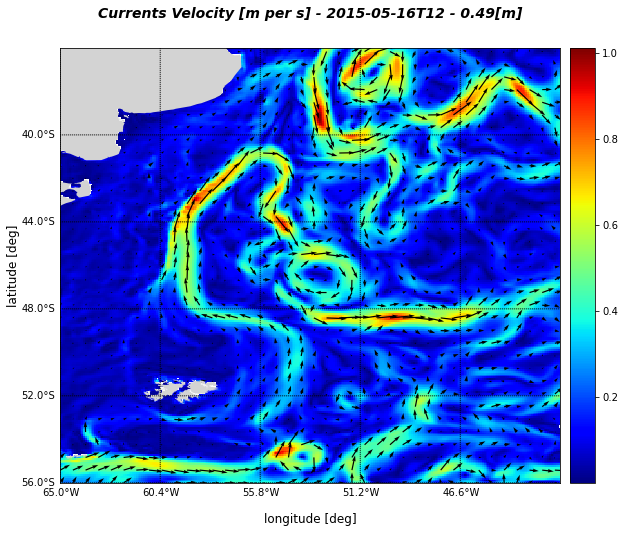

In [34]:
for t in time_indexes:
    if dataset_3D:
        data = var_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
        data_uo = uo_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
        data_vo = vo_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
    else: 
        data = var_sel[t, lat_indexes, lon_indexes]
        data_uo = uo_sel[t, lat_indexes, lon_indexes]
        data_vo = vo_sel[t, lat_indexes, lon_indexes]

    plt.figure(figsize=(width_inch, height_inch))

    map = Basemap(**map_config)

    ## contour fill
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
    step_value = 0.5
    
    ## pcolormesh
    x = np.linspace(0, map.urcrnrx, data.shape[1])
    y = np.linspace(0, map.urcrnry, data.shape[0])
    
    xx, yy = np.meshgrid(lons_sel, lats_sel)
    
    colormesh = map.pcolormesh(xx, yy, data, vmin=min_value, vmax=max_value, cmap=cmap)
    
    ## --- plot directions ---        
    u = data_uo
    v = data_vo
    
    u_skip = u[::skip_points, ::skip_points]
    v_skip = v[::skip_points, ::skip_points]
    xx_skip = xx[::skip_points, ::skip_points]
    yy_skip = yy[::skip_points, ::skip_points]
    
    map.quiver(xx_skip, yy_skip, u_skip, v_skip, scale=v_scale)

    ## draw meridians and parallels
    step_lat = float((lat_max - lat_min) / 5)
    step_lon = float((lon_max - lon_min) / 5)

    parallels = np.arange(lat_min, lat_max, step_lat)
    meridians = np.arange(lon_min, lon_max, step_lon) 

    map.drawmeridians(meridians, labels=[0,0,0,1], fmt="%2.1f")
    map.drawparallels(parallels, labels=[1,0,0,0], fmt="%2.1f")

    ## draw colorbar
    map.colorbar(colormesh, cbar_position)

    ## draw countries...
    map.drawcountries(linewidth=0.25, color='olive')
    map.fillcontinents(color='lightgray',lake_color='aqua')

    ## ... or draw the world using data from different providers (comment the previous lines!)
#     map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose=False)
#     map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose=False) 
#     map.bluemarble()
#     map.etopo()
#     map.shadedrelief()

    # set title
    title_sel = "Currents Velocity"
    timestep = np.datetime_as_string(times[t],'h')
    var_str = "{} [{}]".format(title_sel, "m per s")
    if dataset_3D:
        depth_str = "{:.2f}{}".format(float(data[depth_name]), "[m]")
        title = ' - '.join((var_str, timestep, depth_str))
    else:
        title = ' - '.join((var_str, timestep))
    
    ## draw title and axes labels
    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, labelpad=xlabelpad, fontsize=12)
    plt.ylabel(ylabel, labelpad=ylabelpad, fontsize=12)    
    
    
    # output file
    output_file = os.path.join(out_path,title.replace(' ','_')) + ".png"

    # save the output file
    plt.savefig(output_file)

    plt.show()

    plt.close()

<div class="alert alert-block alert-warning">

### LET'S TRY: Change the plot!

If you want, you can change the above plot.

For example, you could:
- change the time period
- change the min/max values for the choosen variable
- change the depth level (only for 3D datasets! ;))

Go back to [Configure the variables for the plots](#2.3.8.-Configuration-for-the-currents'-plot) and then re-execute the cell for generating the plot. Try!

Look at the surface current changes from April 2015 to May 2015
 
The Malvinas Current at 41°S went through two distinct regimes in 2015 referred to as ‘‘weak Malvinas’’ (December 2014 and May–September 2015) and ‘‘strong Malvinas’’ (early January to mid-April 2015 and mid-September to the end of November 2015). The distinct regimes at 41°S can be identified in the in situ and PSY4 velocity components. During the ‘‘strong Malvinas’’ regime the Malvinas Current flows northward 41°S. During the “weak Malvinas” the Malvinas Current retroflects southward and the Brazil Current invades the 41°S section. 



***

# 3. Exercise n.2: Plot of transects

### Plot transects of temperature, salinity and density

[Go back to the "Table of contents"](#Table-of-contents)

In the following we will now look at a transect at 51°S in 2011 observe the strong seasonal changes in that area, in link with the Malvinas current system.


# 3.1. About the data

The data are the same used in the [previous exercise](#2.1.-About-the-data).

[Go back to the "Table of contents"](#Table-of-contents)

# 3.2. Download the data

The data can be donwloaded as showed in the [previous exercise](#2.2.-Download-the-data).

[Go back to the "Table of contents"](#Table-of-contents)

# 3.3. The exercise

### 3.3.1. Set the configuration

[Go back to the "Table of contents"](#Table-of-contents)

Set the coordinates min and max values

In [35]:
depth_min = 0
depth_max = 500 # the MLD is not significant below this level of depth (~192m)
lat_point = -51
lon_min = -65
lon_max = -42

Set the index for the dataset array

In [36]:
# selected datasets (comment '#' the unneeded one)
## for year 2011
datasets = file_ds['2011-01'], file_ds['2011-08']

## for year 2015
#datasets = file_ds['2015-04'], file_ds['2015-05']

Extract the indexes of coordinates

In [37]:
time_indexes = 0
depth_indexes = getRangeIndexes(datasets[0].depth, depth_min, depth_max)
if ("lat_point" in locals()):
    lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
    lat_indexes = np.abs(lats-lat_point).argmin()
elif ("lon_point" in locals()):
    lon_indexes = np.abs(lons-lon_point).argmin()
    lat_indexes = getRangeIndexes(lats, lat_min, lat_max)

Extract the coordinates subsets

In [38]:
lons_sel = datasets[0][lon_name][lon_indexes]
lats_sel = datasets[0][lat_name][lat_indexes]
depths_sel = -datasets[0][depth_name][depth_indexes] # note the minus '-ds'. Why?

### 3.3.2. Configure the variables for the plot
[Go back to the "Table of contents"](#Table-of-contents)

In [39]:
TEM = [ds[tem_name][time_indexes, depth_indexes, lat_indexes, lon_indexes] for ds in datasets]
SAL = [ds[sal_name][time_indexes, depth_indexes, lat_indexes, lon_indexes] for ds in datasets]
MLD = [ds[mld_name][time_indexes, lat_indexes, lon_indexes] for ds in datasets]
UO = [ds[uo_name][time_indexes, depth_indexes, lat_indexes, lon_indexes] for ds in datasets]

#### Set the parameters for the plot

In [40]:
# Plot configuration
width_inch = 14
height_inch = 8

# Axes labels
fontsize = 14
xlabel = "longitude [degN]"
ylabel = "depth [m]"

# Colorbar configuration
cmap = "jet"
cbar_position = "right"

contour_levels = 100

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}
label_fontstyle = {
    "fontsize": "12",
#     "labelpad": 10
}

### 3.3.3. Function for plotting the transect 
[Go back to the "Table of contents"](#Table-of-contents)

In [41]:
# arguments:
# - data: data to plot - 2 dim array
# - minmaxvalues: [{ "min": None, "max": None},{ "min": None, "max": None}]
# - step_value: step in levels. If it is 0, then levels = 100
# - title
# - coords_sel
# - depths_sel
def plot_transect(data_plot, minmaxvalues, step_value, title, coords_sel, depths_sel):
    title_sel = title['name']
    title_uni = title['units']
    
    fig = plt.figure(figsize=(width_inch, height_inch))
    
    xx, yy = np.meshgrid(coords_sel, depths_sel)
    
    ### --- PLOT 1 ---###
    fig.add_subplot(1, 2, 1)
    
    idx = 0
    data = data_plot[idx]
  
    # set variable limits
    min_value = data.min() if minmaxvalues[idx]['min'] is None else minmaxvalues[idx]['min']
    max_value = data.max() if minmaxvalues[idx]['max'] is None else minmaxvalues[idx]['max']
    
    #contour_levels = np.arange(min_value, max_value, step_value)  if step_value > 0 else 100

    ## contour fill
    colormesh =  plt.pcolormesh(xx, yy, data, cmap=cmap, vmin=min_value, vmax=max_value)
    
    plt.grid()
    plt.colorbar(colormesh)
    
    # Get the timestep
    timestep = np.datetime_as_string(data.time,'h')
    
    var_str = "{} [{}]".format(title_sel, title_uni)
    title = ' - '.join((var_str, timestep))

    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, **label_fontstyle)
    plt.ylabel(ylabel, **label_fontstyle)
    
    
    ### --- PLOT 2 ---###
    fig.add_subplot(1, 2, 2)
    
    idx = 1
    data = data_plot[idx]
    
    # set variable limits
    min_value = data.min() if minmaxvalues[idx]['min'] is None else minmaxvalues[idx]['min']
    max_value = data.max() if minmaxvalues[idx]['max'] is None else minmaxvalues[idx]['max']
    
    #contour_levels = np.arange(min_value, max_value, step_value)  if step_value > 0 else 100
     
    ## contour fill
    colormesh =  plt.pcolormesh(xx, yy, data, cmap=cmap, vmin=min_value, vmax=max_value)
    
    plt.grid()
    plt.colorbar(colormesh)
        
    # Get the timestep
    timestep = np.datetime_as_string(data.time,'h')
    var_str = "{} [{}]".format(title_sel, title_uni)
    title = ' - '.join((var_str, timestep))

    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, **label_fontstyle)
    plt.ylabel(ylabel, **label_fontstyle)

    # output file
    output_file = os.path.join(out_path,title.replace(' ','_')) + ".png"

    # save the output file\
    plt.savefig(output_file)

    plt.show()

    plt.close()

#### Select and plot the dataset for temperature in winter and summer

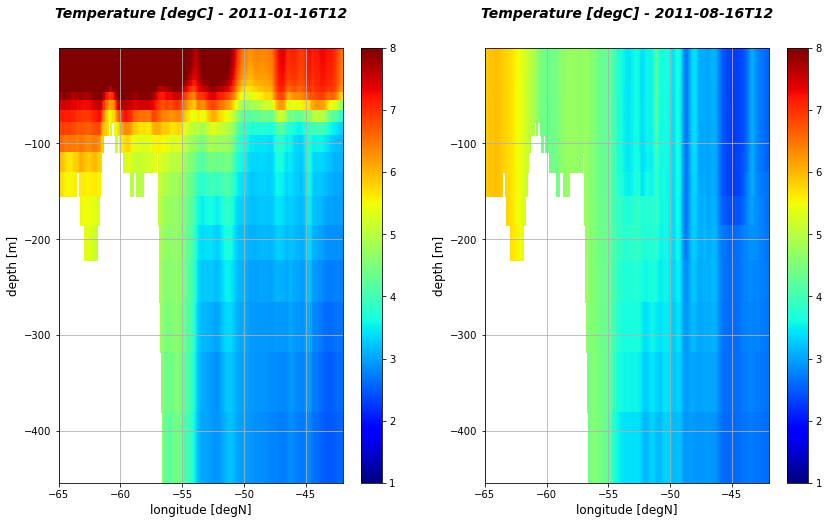

In [42]:
data = TEM

title = {"name":"Temperature","units":"degC"}

# plot the transect
plot_transect(data, [{ "min": 1., "max": 8.},{ "min": 1., "max": 8.}], 0, title, lons_sel, depths_sel)

#### Select and plot the dataset for salinity in winter and summer

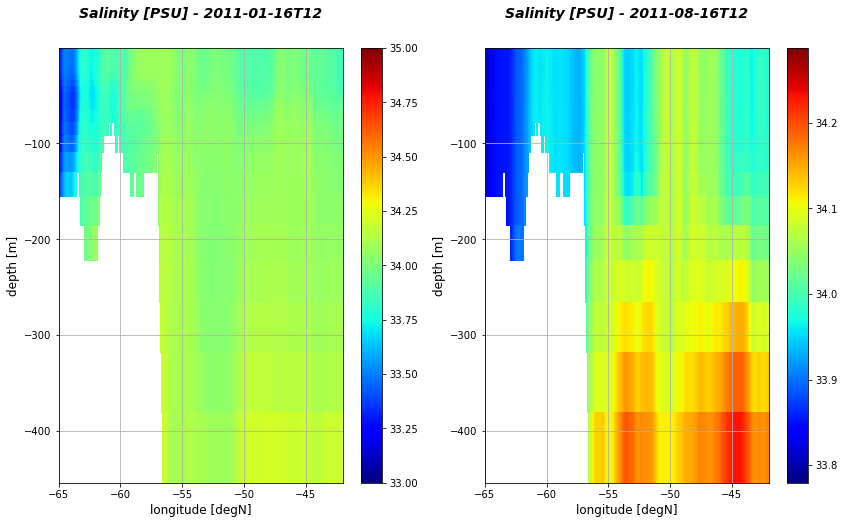

In [43]:
data = SAL

title = {"name":"Salinity","units":"PSU"}

# plot the transect
plot_transect(data, [{ "min": 33, "max": 35},{ "min": None, "max": None}], 0, title, lons_sel, depths_sel)


Seasonal changes in temperature and salinity are large. In the following, we will also have a look at the zonal current and its vertical structure. 


### 3.3.4. Density and MLD comparison
[Go back to the "Table of contents"](#Table-of-contents)

In [44]:
def plot_density(plot_data, data, MLD, title, coords_sel, depths_sel):
    # def plot_transect2(data, min_value, max_value, step_value):
    fig = plt.figure(figsize=(width_inch, height_inch))

    # Get the timestep
    timestep = np.datetime_as_string(data.time,'h')

    # Create the meshgrid for the plot 
    yy, zz = np.meshgrid(coords_sel, depths_sel)

    ## contour fill
    plt.contourf(yy, zz, plot_data, contour_levels, cmap=cmap)

    plt.grid()
    plt.colorbar(extend='both')

    title_sel = title['name']
    var_str = "{} [{}]".format(title_sel, title['units'])
    title = ' - '.join((var_str, timestep))

    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, **label_fontstyle)
    plt.ylabel(ylabel, **label_fontstyle)

    plt.plot(yy[0,:],-MLD, linewidth=2, color='black', label="MLD")
    plt.legend()
    
    # output file
    output_file = os.path.join(out_path, "_".join((title_sel, timestep)) + ".png")

    # save the output file
    plt.savefig(output_file)

    plt.show()

    plt.close()

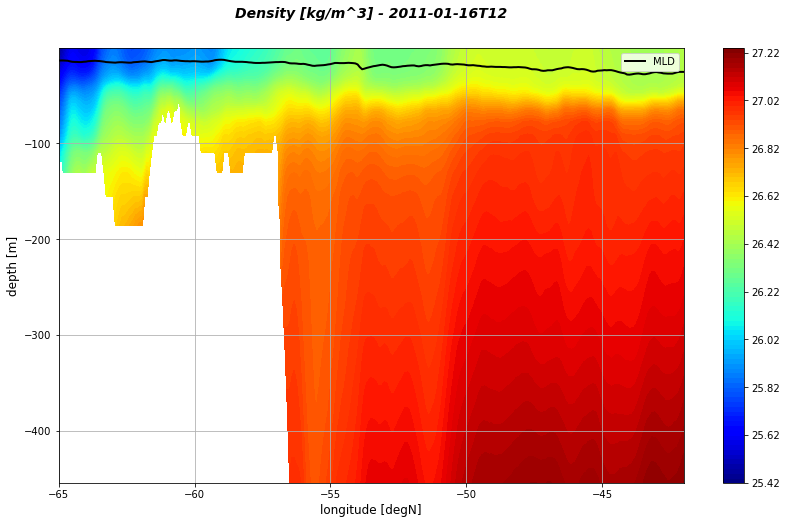

In [45]:
j = 0
# Calculate density
rho = density.sigma0(SAL[j],TEM[j])

data = TEM[j]
plot_data = rho

title = {"name":"Density","units":"kg/m^3"}

plot_density(plot_data, data, MLD[j], title, lons_sel, depths_sel)

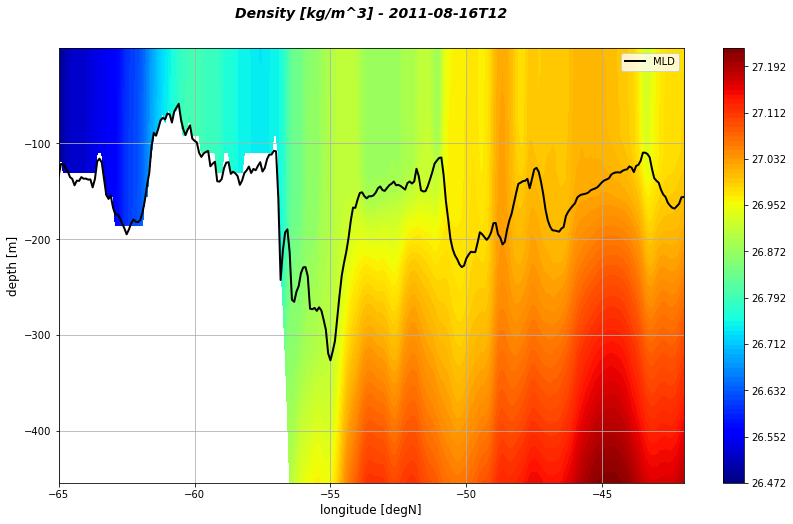

In [46]:
j = 1
# Calculate density
rho = density.sigma0(SAL[j],TEM[j])

data = TEM[j]
plot_data = rho

title = {"name":"Density","units":"kg/m^3"}

plot_density(plot_data, data, MLD[j], title, lons_sel, depths_sel)

Here you have seen the impact of the season and of the ocean circulation changes on the physical properties of the marine water at different latitudes, and the corresponding change in the mixed layer depth too. 


The Mixed Layer Depth changes from 10 m in January (strong summer thermocline) to over 500 m in August region due to important winter convection. 

In winter the western portion of the section shows larger mixed layer depths than the eastern portion. 
Waters in the west correspond to Subantarctic waters, less dense than Polar waters located in the eastern portion.  

NB: in this notebook monthly means are used while daily outputs were used in the reference article, have a look at the reference articles for further illustrations and validation of the GLO MFC products in the area with different sources of observations, including independant (not assimilated) in situ observations.


[Go back to the "Table of contents"](#Table-of-contents)

***

# 4. Conclusion

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### Now you know how to plot the Global physical model provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### To go further, you can try to visualize other variables and diagnostics (spatial or vertical averages, standard deviations...)

#### Hope you have enjoyed this session and let's do great science with our data.

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 

[Go back to the "Table of contents"](#Table-of-contents)